<a href="https://colab.research.google.com/github/ShubhankarMahajan/SMEC-Hackathon/blob/main/Face_Recognition_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepface
!apt install libzbar0
!pip install pyzbar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libzbar0 is already the newest version (0.10+doc-10.1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Face_Recognition//

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Face_Recognition


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
QR_filename = 'QR_Code_Verify.jpg'
def take_photo(filename=QR_filename, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to QR_Code_Verify.jpg


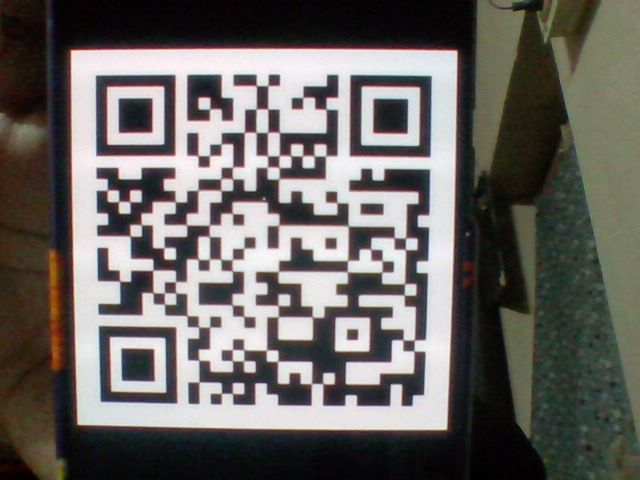

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from pyzbar import pyzbar
import numpy,cv2
from PIL import Image
font = cv2.FONT_HERSHEY_PLAIN
pil = Image.open(filename)
open_cv_image = numpy.array(pil)
decodedObjects = pyzbar.decode(open_cv_image)
for obj in decodedObjects:
        #print("Data", obj.data)
        cv2.putText(open_cv_image, str(obj.data), (50, 50), font, 2,(255, 0, 0), 3)
zip_file_name = str(obj.data)[9:-1]
print(zip_file_name)

offlineaadhaar20211031114715632.zip


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import os

os.system("cd Face_Recognition")
pswd = '1234'
with zipfile.ZipFile(zip_file_name) as zip_file:
  with zip_file.open('offlineaadhaar20211031114715632.xml',mode='r',pwd = bytes(pswd, 'utf-8')) as xml_file:
    xml_data = xml_file.read()
xml_data= str(xml_data)
base64_img = bytes(xml_data[xml_data.find("<Pht>")+5:xml_data.find("</Pht>")],'utf-8')
user_name = (xml_data[xml_data.find("name=")+6:xml_data.find("\"/><Poa careof")]).replace(" ","_")
imgdata = base64.b64decode(base64_img)
filename = user_name+"_Verify.png"
verify_username = filename
def take_photo(filename=filename, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to Shubhankar_Mahajan_Verify.png


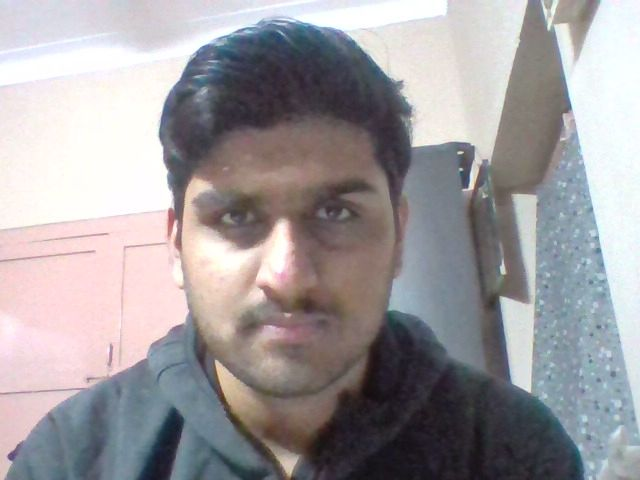

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from deepface import DeepFace
import zipfile
import os, base64
os.system("cd Face_Recognition")
pswd = '1234'
with zipfile.ZipFile(zip_file_name) as zip_file:
  with zip_file.open('offlineaadhaar20211031114715632.xml',mode='r',pwd = bytes(pswd, 'utf-8')) as xml_file:
    xml_data = xml_file.read()
xml_data= str(xml_data)
base64_img = bytes(xml_data[xml_data.find("<Pht>")+5:xml_data.find("</Pht>")],'utf-8')
user_name = (xml_data[xml_data.find("name=")+6:xml_data.find("\"/><Poa careof")]+".png").replace(" ","_")
imgdata = base64.b64decode(base64_img)
filename = user_name
with open(filename, 'wb') as f:
    f.write(imgdata)
result = DeepFace.verify(img1_path = user_name, img2_path = verify_username)
os.remove(user_name)
os.remove(verify_username)
os.remove(QR_filename)

{'verified': True, 'distance': 0.2165986300745637, 'max_threshold_to_verify': 0.4, 'model': 'VGG-Face', 'similarity_metric': 'cosine'}


In [ ]:
if result['verified']:
  print("User Authenticaiton Successful!")
else:
  print("User couldn't be recognized. Please try again!")

User Authenticaiton Successful!
